<a href="https://colab.research.google.com/github/mickeykubo/fastai-v1/blob/master/lesson4_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!curl https://course-v3.fast.ai/setup/colab | bash
!pip3 install https://download.pytorch.org/whl/cu80/torch-1.0.0-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision
!pip3 install fastai
!pip3 install Pillow==4.1.1  

    100% |████████████████████████████████| 532.5MB 28kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5e530000 @  0x7fcdaddcd2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 2.4MB/s 
    100% |████████████████████████████████| 2.0MB 10.9MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 153kB 6.7MB/s 
    100% |████████████████████████████████| 112kB 28.1MB/s 
  Running setup.py bdist_wheel for bottleneck ... - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/f2/bf/ec/e0f39aa27001525ad455139ee57ec7d0776fe074dfd78c97e4
  Running setup.py bdist_wheel for nvidia-ml-py3 

In [0]:
from fastai.collab import *
from fastai.tabular import *

## Collaborative filtering example(協調フィルタリングの例)

`collab` models use data in a `DataFrame` of user, items, and ratings.

fastaiのcollabモジュールは，ユーザー，アイテム，評価を含んだデータフレームを扱う．

Movie Lensのデータの小規模版を読み込み，読み込んだパスからrating.csvをpandasで読みデータフレームratingsを生成する．

In [0]:
user,item,title = 'userId','movieId','title'

In [6]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [7]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


That's all we need to create and train a model:

訓練用のデータ束をデータフレームから生成する．

50の潜在因子に埋め込んだ協調フィルタリングの学習器を作り，訓練する．

In [0]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [0]:
y_range = [0,5.5]

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [11]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss
1,1.629606,0.950929
2,0.851734,0.670749
3,0.640076,0.660735


## Movielens 100k

Let's try with the full Movielens 100k data dataset, available from http://files.grouplens.org/datasets/movielens/ml-100k.zip

より大規模なデータを用いて学習する．

In [46]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip

--2019-01-09 04:32:31--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.34.235
Connecting to files.grouplens.org (files.grouplens.org)|128.101.34.235|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  3.44MB/s    in 1.4s    

2019-01-09 04:32:33 (3.44 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]



In [64]:
!mkdir data
!mkdir data/ml-100k/

rm: cannot remove 'data/ml-100k': Is a directory
mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/ml-100k/’: File exists


In [0]:
path=Path('data/ml-100k/')

In [0]:
!unzip data/ml-100k.zip

In [0]:
!mv ml-100k/* data/ml-100k/

In [0]:
# エラーする！
#path2 = untar_data(" http://files.grouplens.org/datasets/movielens/ml-100k", path)
#path2

In [75]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [76]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [77]:
len(ratings)

100000

moviesデータフレームのタイトルを，ratingsデータフレームにマージする．

In [78]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data = CollabDataBunch.from_df(rating_movie, seed=42, pct_val=0.1, item_name=title)

In [80]:
data.show_batch()

userId,title,target
99,"Time to Kill, A (1996)",3.0
407,Maverick (1994),4.0
523,Victor/Victoria (1982),5.0
655,Annie Hall (1977),5.0
588,Dances with Wolves (1990),2.0


In [0]:
y_range = [0,5.5]

In [0]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

epoch,train_loss,valid_loss


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


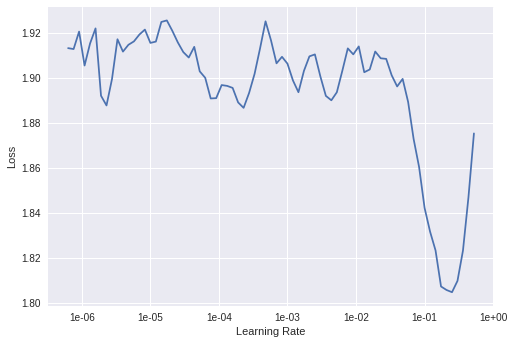

In [83]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [84]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss
1,0.917691,0.942535
2,0.889397,0.874840
3,0.790432,0.831701
4,0.646931,0.814153
5,0.565970,0.812184


In [0]:
learn.save('dotprod')

Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on RMSE of 0.91, which corresponds to an MSE of `0.91**2 = 0.83`.

## Interpretation

### Setup

In [0]:
learn.load('dotprod');

In [0]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [0]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

### Movie bias

In [0]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [0]:
item0 = lambda o:o[0]

In [0]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3264),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3241),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2799), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2761), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2703), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2484), 'Leave It to Beaver (1997)', 1.8409090909090908),
 (tensor(-0.2413), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2395), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2389), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2346), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2325), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2294), 'Beverly Hills Ninja (1997)', 2.3125),
 (tensor(-0.2223), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2218), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2117), "Stephen King's T

In [0]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.6105), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5817), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5685), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5451), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5350), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5341), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5330), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5227), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.5114), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4800), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4698), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4589), 'Close Shave, A (1995)', 4.491071428571429),
 (tensor(0.4567), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4566), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4542), 'Godfather, The (1972)', 4.283292978208232)]

### Movie weights

In [0]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

In [0]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [0]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.0834), 'Chinatown (1974)'),
 (tensor(1.0517), 'Wrong Trousers, The (1993)'),
 (tensor(1.0271), 'Casablanca (1942)'),
 (tensor(1.0193), 'Close Shave, A (1995)'),
 (tensor(1.0093), 'Secrets & Lies (1996)'),
 (tensor(0.9771), 'Lawrence of Arabia (1962)'),
 (tensor(0.9724), '12 Angry Men (1957)'),
 (tensor(0.9660), 'Some Folks Call It a Sling Blade (1993)'),
 (tensor(0.9517), 'Ran (1985)'),
 (tensor(0.9460), 'Third Man, The (1949)')]

In [0]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.2521), 'Jungle2Jungle (1997)'),
 (tensor(-1.1917), 'Children of the Corn: The Gathering (1996)'),
 (tensor(-1.1746), 'Home Alone 3 (1997)'),
 (tensor(-1.1325), "McHale's Navy (1997)"),
 (tensor(-1.1266), 'Bio-Dome (1996)'),
 (tensor(-1.1115), 'D3: The Mighty Ducks (1996)'),
 (tensor(-1.1062), 'Leave It to Beaver (1997)'),
 (tensor(-1.1051), 'Congo (1995)'),
 (tensor(-1.0934), 'Batman & Robin (1997)'),
 (tensor(-1.0904), 'Flipper (1996)')]

In [0]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.8120), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(0.7939), 'Keys to Tulsa (1997)'),
 (tensor(0.7862), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(0.7634), 'Trainspotting (1996)'),
 (tensor(0.7494), 'Brazil (1985)'),
 (tensor(0.7492), 'Heavenly Creatures (1994)'),
 (tensor(0.7446), 'Clockwork Orange, A (1971)'),
 (tensor(0.7420), 'Beavis and Butt-head Do America (1996)'),
 (tensor(0.7271), 'Rosencrantz and Guildenstern Are Dead (1990)'),
 (tensor(0.7249), 'Jude (1996)')]

In [0]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1900), 'Braveheart (1995)'),
 (tensor(-1.0113), 'Raiders of the Lost Ark (1981)'),
 (tensor(-0.9670), 'Titanic (1997)'),
 (tensor(-0.9409), 'Forrest Gump (1994)'),
 (tensor(-0.9151), "It's a Wonderful Life (1946)"),
 (tensor(-0.8721), 'American President, The (1995)'),
 (tensor(-0.8211), 'Top Gun (1986)'),
 (tensor(-0.8207), 'Hunt for Red October, The (1990)'),
 (tensor(-0.8177), 'Sleepless in Seattle (1993)'),
 (tensor(-0.8114), 'Pretty Woman (1990)')]

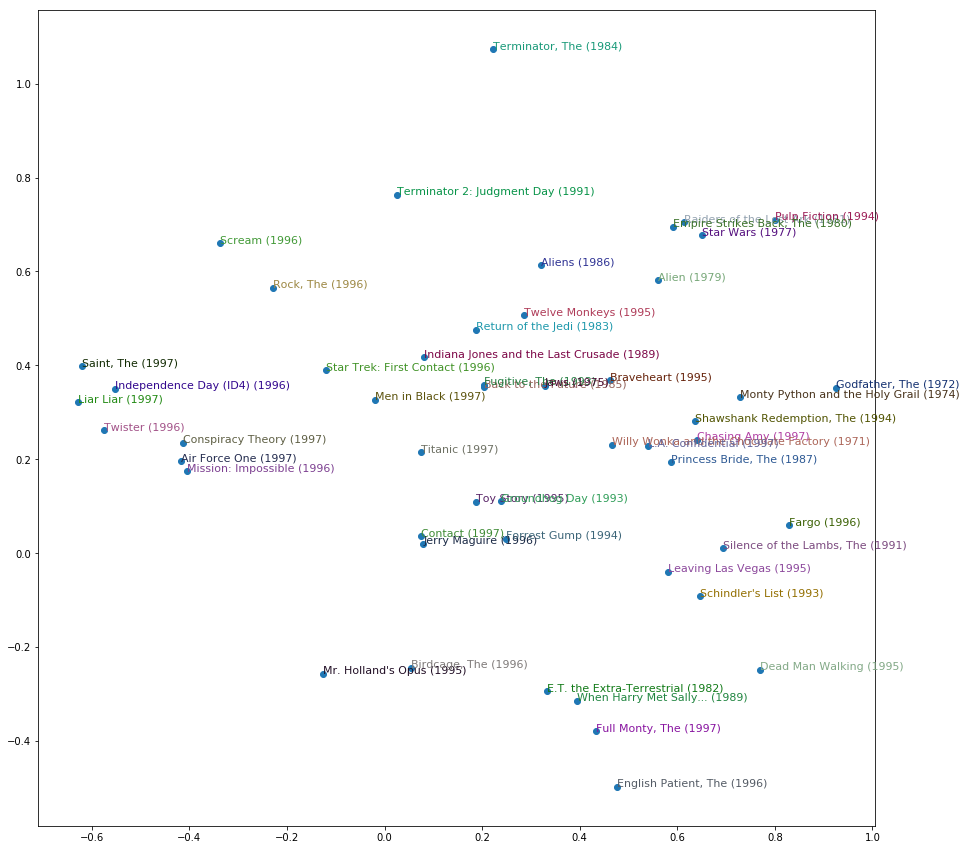

In [0]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()